C:\Users\neera\AppData\Local\Temp\ipykernel_16896\375808991.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_role.values, y=avg_by_role.index, palette="viridis")


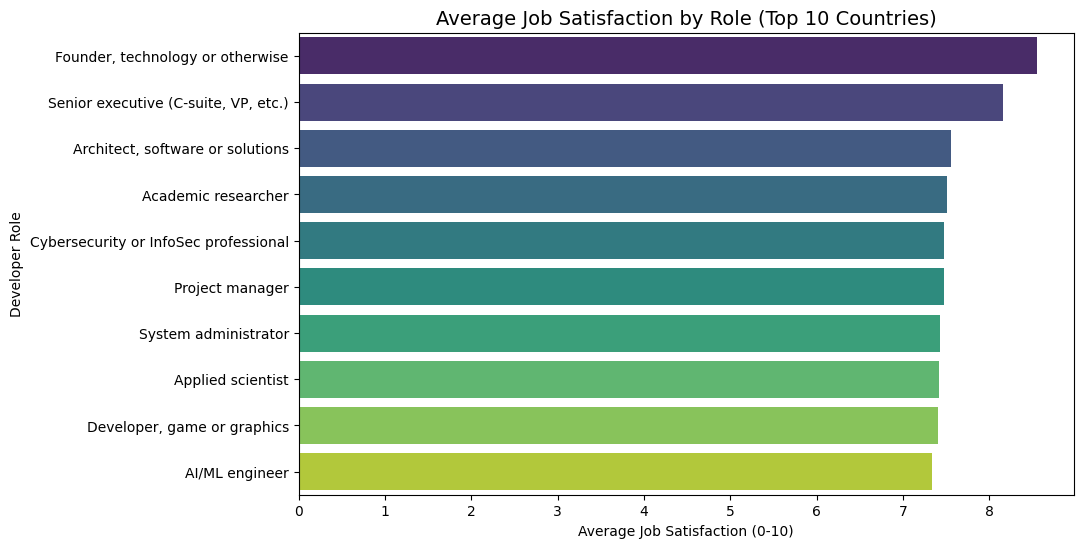

C:\Users\neera\AppData\Local\Temp\ipykernel_16896\375808991.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_country.values, y=avg_by_country.index, palette="magma")


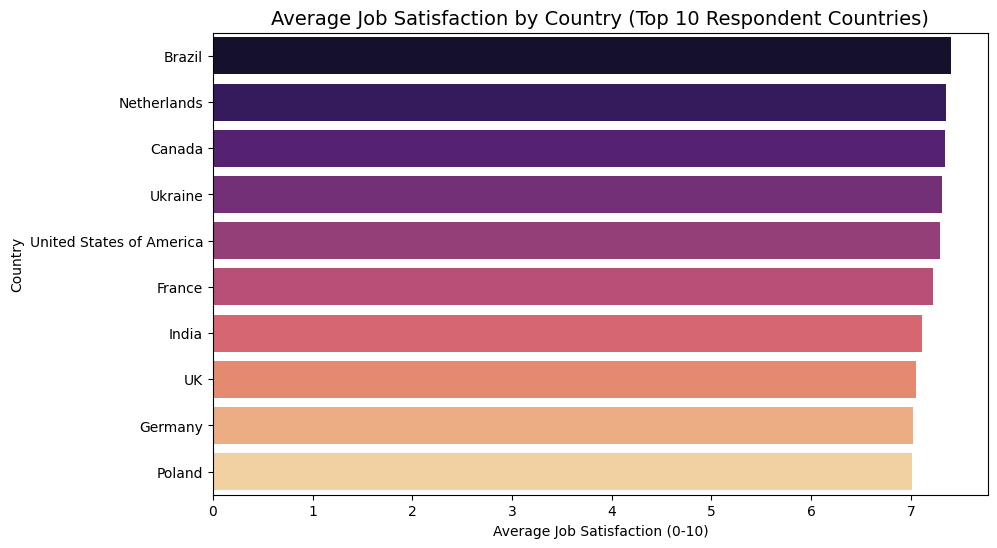

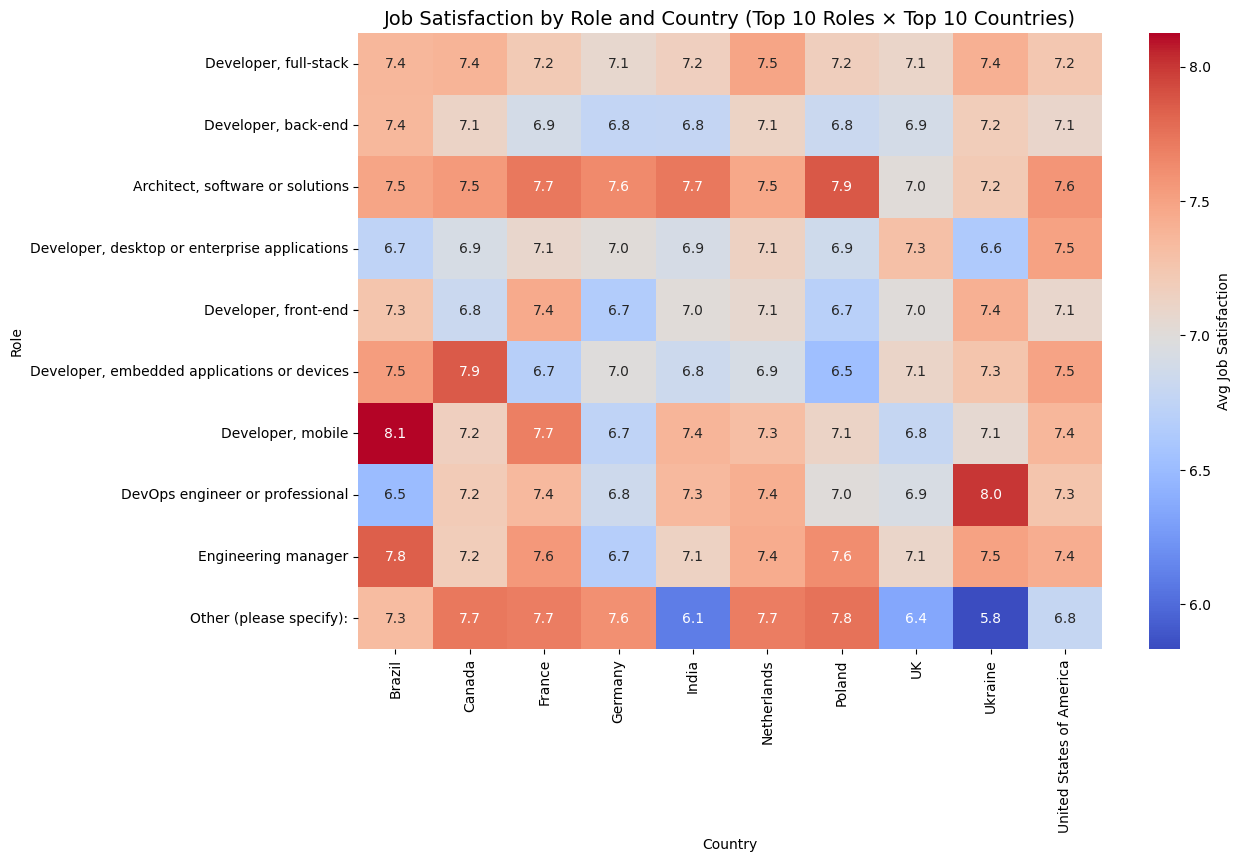

In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/neera/Downloads/stack-overflow-developer-survey-2025/survey_results_public.csv")


# Select only the relevant columns
df = df[["DevType", "Country", "JobSat"]]

# Drop rows with missing values
df = df.dropna(subset=["DevType", "Country", "JobSat"])

# Ensure JobSat is numeric (in case it's read as string)
df["JobSat"] = pd.to_numeric(df["JobSat"], errors="coerce")

#Rename "United Kingdom of Great Britain and Northern Ireland" to "UK" for better readabilty 
df['Country'] = df['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'UK'
})

# Split multiple job roles (DevType is often a semicolon-separated string)
df["DevType"] = df["DevType"].str.split(";")

# Explode into separate rows so each role is counted individually
df = df.explode("DevType")

# Clean up whitespace in job role names
df["DevType"] = df["DevType"].str.strip()

# Optional: remove very rare roles (appearing < 50 times, for example)
role_counts = df["DevType"].value_counts()
df = df[df["DevType"].isin(role_counts[role_counts > 50].index)]

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)
df.head(10)

# Top 10 countries by number of responses
top_countries = df["Country"].value_counts().head(10).index
df_top10 = df[df["Country"].isin(top_countries)]

import seaborn as sns
import matplotlib.pyplot as plt

# Average satisfaction by role (top 10 roles only, for readability)
avg_by_role = (
    df_top10.groupby("DevType")["JobSat"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_by_role.values, y=avg_by_role.index, palette="viridis")
plt.title("Average Job Satisfaction by Role (Top 10 Countries)", fontsize=14)
plt.xlabel("Average Job Satisfaction (0-10)")
plt.ylabel("Developer Role")
plt.show()

# Average satisfaction by country (top 10 roles only, for readability)
avg_by_country = (
    df_top10.groupby("Country")["JobSat"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_by_country.values, y=avg_by_country.index, palette="magma")
plt.title("Average Job Satisfaction by Country (Top 10 Respondent Countries)", fontsize=14)
plt.xlabel("Average Job Satisfaction (0-10)")
plt.ylabel("Country")
plt.show()

# Role X Country Heatmap

pivot_role_country = df_top10.pivot_table(
    index="DevType",
    columns="Country",
    values="JobSat",
    aggfunc="mean"
)


top10_roles = df_top10["DevType"].value_counts().head(10).index
pivot_role_country = pivot_role_country.loc[top10_roles]

plt.figure(figsize=(12,8))
sns.heatmap(pivot_role_country, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Avg Job Satisfaction'})
plt.title("Job Satisfaction by Role and Country (Top 10 Roles × Top 10 Countries)", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Role")
plt.show()



